In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from scipy.stats.mstats import winsorize

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')

Bu veri seti hem hasta hem de sağlıklı vakalardan oluşur.Sınıflandırma için 13 özelliğe sahip toplam 303 vaka kullanılmıştır.
Bu özellikler yaş, cinsiyet, göğüs ağrısı tipi, istirahat kanbasıncı, serum kolestoral, açlık kan şekeri,
istirahat elektrokardiyografik sonuçlar, elde edilen maksimum kalp hızı, egzersize bağlı anjin, istirahate göre egzersize bağlı ST depresyonu, ST segmentinin eğimi, pik egzersiz için floroskopi ile renklendirilmiş büyük damar sayısı, defekt tipidir. Öznitelikler aşağıdaki ayrıntılı şekilde açıklanmıştır:
1) yaş (numerik)
2) cinsiyet (0, 1)
 0: dişi
 1: erkek
3) cp (0,1,2,3): göğüs ağrısı tipi
 0: tipik anjin ağrı
 1: atipik anjin ağrı
 2: anjin olmayan ağrı
 3: asemptomatik ağrı
4) trestbps (numerik): istirahat kanbasıncı
5) chol (numerik): serum kolestoral
6) fbs (0, 1): açlık kan şekeri
 0: yanlış
 1: doğru
7) restecg (0, 1, 2): istirahat elektrokardiyografik sonuçlar
 0: normal
 1: ST-T anormalliği
 2: olası veya belirgin sol ventriküler Estes kriteri
8) thalach (numerik): elde edilen maksimum kalp hızı
9) exang (0, 1): egzersize bağlı anjin
 0: yok
 1: var
10) oldpeak (numerik): istirahate göre egzersize bağlı ST depresyonu
11) slope (0,1,2): ST segmentinin eğimi
 0: yukarı doğru
 1: düz
 2: aşağı doğru
12) ca ( 0,1,2,3,4): pik egzersiz için floroskopi ile renklendirilmiş büyük damar sayısı
13) thal (3,6,7): defekt tipi
 3: normal
 6: belirlenmiş defekt
 7: tersinir defekt

In [88]:
data = pd.read_csv("heart.csv")

In [89]:
df=data.copy()

In [90]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [93]:
df.shape

(303, 14)

In [94]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Yukarıda hepsi nümerik olarak gözüküyordu ancak anlıyoruz ki bazı değişkenler kategorik.
Örnek : sex,cp,fbs... vb. 

In [95]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Nümerik veri tipinden kategorik vei tipine çeviriyoruz.

In [96]:
df['sex'] = df['sex'].astype('object')

In [97]:
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [99]:
#Şimdi eksik değerlere bakalım.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Herhangi bir eksik veri bulunmamaktadır. Ancak eksik veriler olsaydı aşağıdaki çözümleri kullanabilirdik.
 Eksik değer içeren kayıtlar silinebilir.
 Eksik değerler yerine ortalama kullanılabilir.
 Eksik değerler yerine medyan kullanılabilir.
 Eksik değerler yerine içinde bulunduğu sınıfın ortalaması kullanılabilir.
 Eksik değerler yerine regresyon gibi yöntemler kullanarak en uygun değer kullanılabilir. 

In [100]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

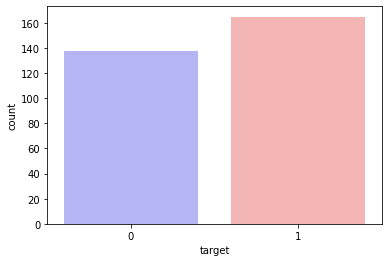

In [101]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [102]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Kalp Hastası olmayanların Yüzdesi {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Hastası olanların Yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Kalp Hastası olmayanların Yüzdesi 45.54%
Kalp Hastası olanların Yüzdesi: 54.46%


Yukarıda ki sonuçlardan imbalanced bir veri olmadığını söyleyebiliriz. Böylece sentetik veri türetme işlemlerini yapmamıza gerek yok.
Aksi durumda accuracy metriği (performans ölçüm metriği) anlamlı olmazdı.

In [103]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [104]:
df.groupby('target').mean()

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507
1,52.496970,129.303030,242.230303,158.466667,0.583030


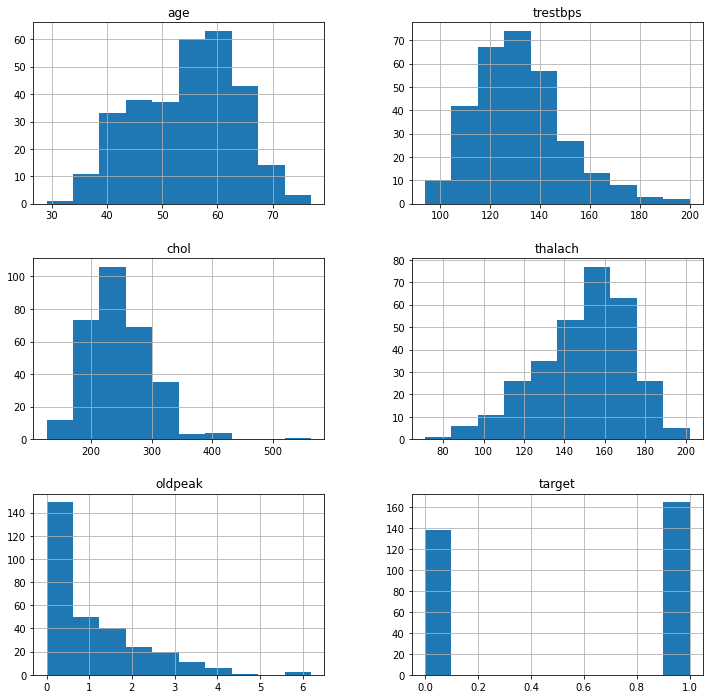

In [105]:
# Nümerik olan özniteliklerin nasıl dağıldığına bakalım.
df.hist(figsize = (12, 12))
plt.show()

Aykırı değerler mevcut mu boxplot ile bakalım.

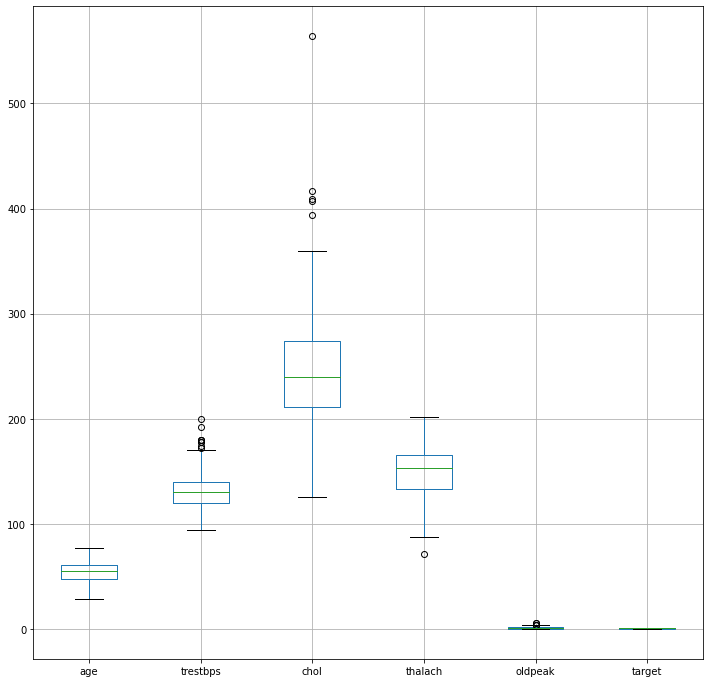

In [106]:
df.boxplot(figsize = (12, 12))
plt.show()

Aykırı değer olarak trestbps, chol ve thalach özniteliklerine detaylı bakalım.

<AxesSubplot:title={'center':'trestbps'}, xlabel='trestbps'>

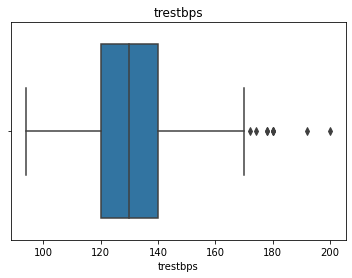

In [107]:
plt.title('trestbps')
sns.boxplot(df.trestbps)

In [108]:
win_trestbps = winsorize(df["trestbps"], (0,0.05))

<AxesSubplot:title={'center':'winsorize_trestbps'}>

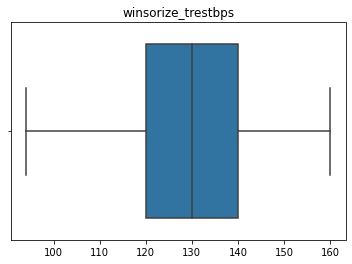

In [109]:
plt.title('winsorize_trestbps')
sns.boxplot(win_trestbps)

In [110]:
df["trestbps"]=win_trestbps

<AxesSubplot:title={'center':'chol'}, xlabel='chol'>

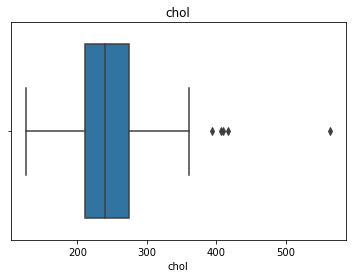

In [111]:
plt.title('chol')
sns.boxplot(df.chol)

In [112]:
win_chol = winsorize(df["chol"], (0,0.02))

<AxesSubplot:title={'center':'winsorize_thalach'}>

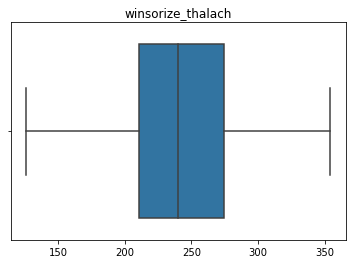

In [113]:
plt.title('winsorize_thalach')
sns.boxplot(win_chol)

In [114]:
df["chol"]=win_chol

<AxesSubplot:title={'center':'thalach'}, xlabel='thalach'>

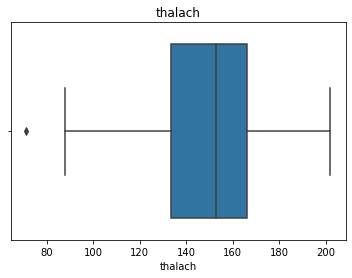

In [115]:
plt.title('thalach')
sns.boxplot(df.thalach)

Bu aykırı değerleri verisetinden çıkarabilir,winsorize edebilir ya da logaritmasını alıp yok olup olmadığına bakabiliriz.
Burada winsorize işlemini uygulayarak aykırı değerleri sınırlandırıyorum.

In [116]:
df["thalach"] = winsorize(df["thalach"], (0.009, 0))

<AxesSubplot:title={'center':'winsorize_thalach'}, xlabel='thalach'>

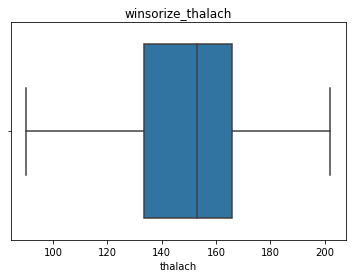

In [117]:
plt.title('winsorize_thalach')
sns.boxplot(df.thalach)

Şimdi veriler hakkında bilgi sahibi olalım. Özniteliklerden hangilerinin nasıl etkilediğini görelim. Keşif yapalım.

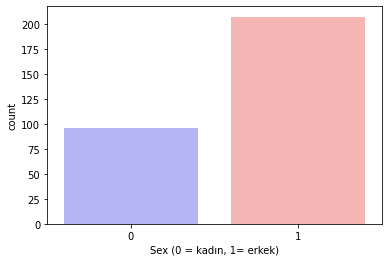

In [118]:
#Cinsiyete göre bakalım. Genel olarak erkeklerin daha fazla olduğu görülüyor.

sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = kadın, 1= erkek)")
plt.show()

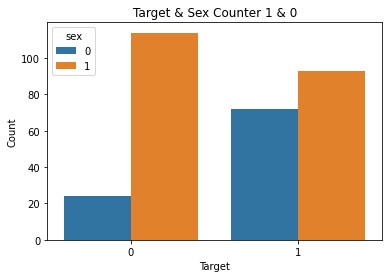

In [119]:
sns.countplot(df.target,hue=df.sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

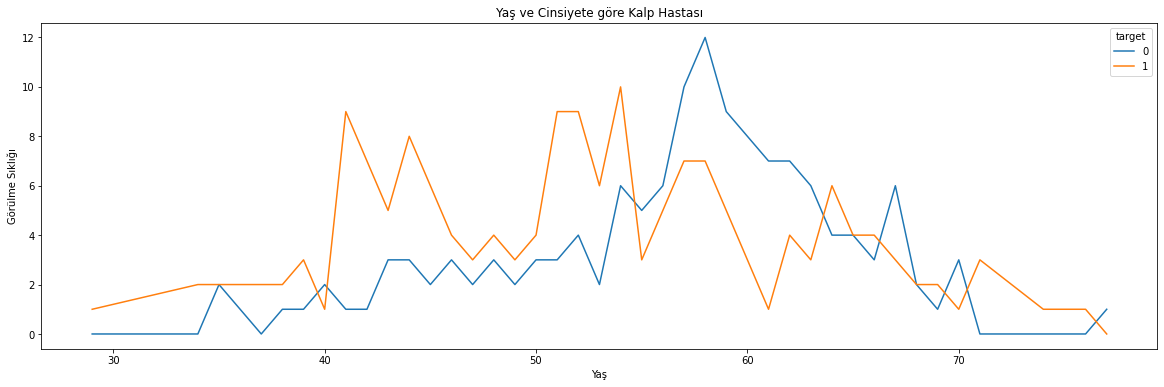

In [120]:
pd.crosstab(df.age,df.target).plot(kind="line",figsize=(20,6))
plt.title('Yaş ve Cinsiyete göre Kalp Hastası')
plt.xlabel('Yaş')
plt.ylabel('Görülme Sıklığı')
plt.show()
#Kadınlarda 50-60 yaş aralığında peak yaptığını görüyoruz.

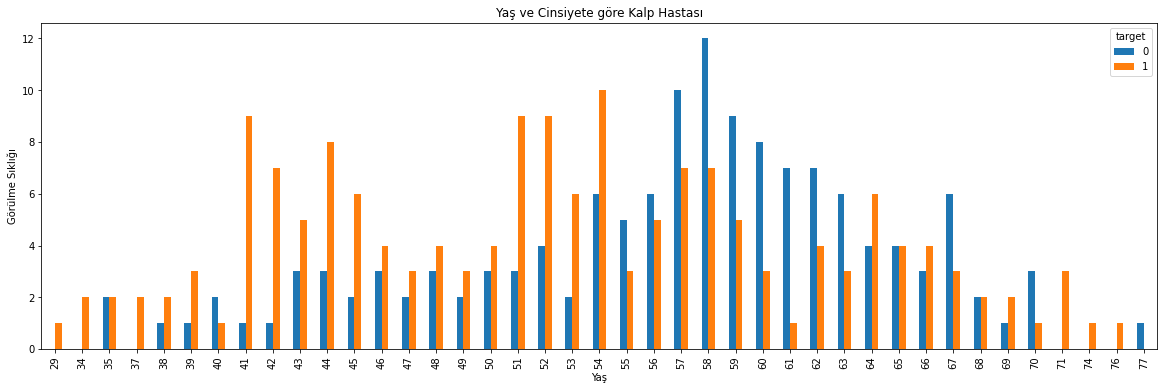

In [121]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Yaş ve Cinsiyete göre Kalp Hastası')
plt.xlabel('Yaş')
plt.ylabel('Görülme Sıklığı')
plt.show()

#54 yaşına kadar erkeklerde daha çok görülürken 54 yaşından sonra genelde kadınlarda daha çok görüldüğünü yorumlayabiliriz.

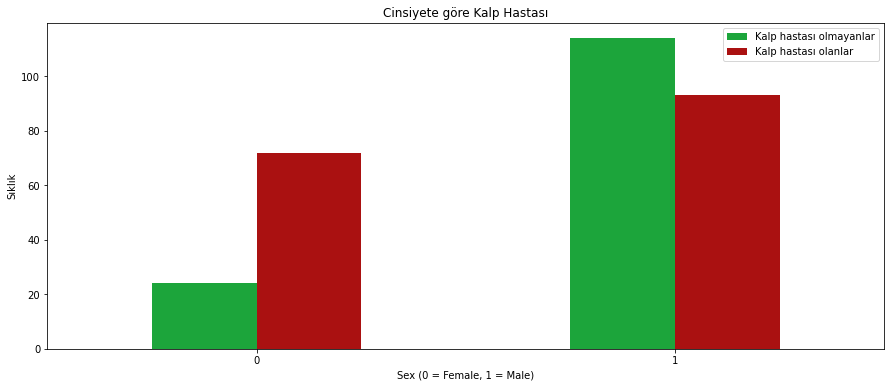

In [122]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Cinsiyete göre Kalp Hastası')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()

Kadınlarda daha imbalanced bir veri olduğu söylenebilir.

In [123]:
total_genders_count=len(df.sex)
male_count=len(df[df['sex']==1])
female_count=len(df[df['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


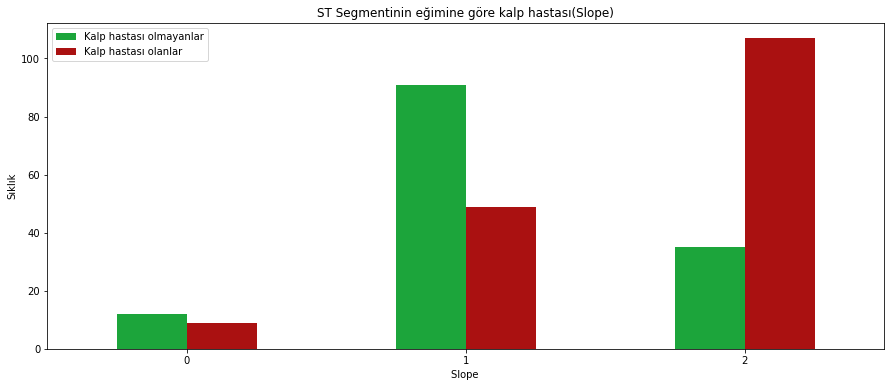

In [124]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('ST Segmentinin eğimine göre kalp hastası(Slope)')
plt.xlabel('Slope ')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.show()


#slope (0,1,2): ST segmentinin eğimi
# 0: yukarı doğru
# 1: düz
# 2: aşağı doğru

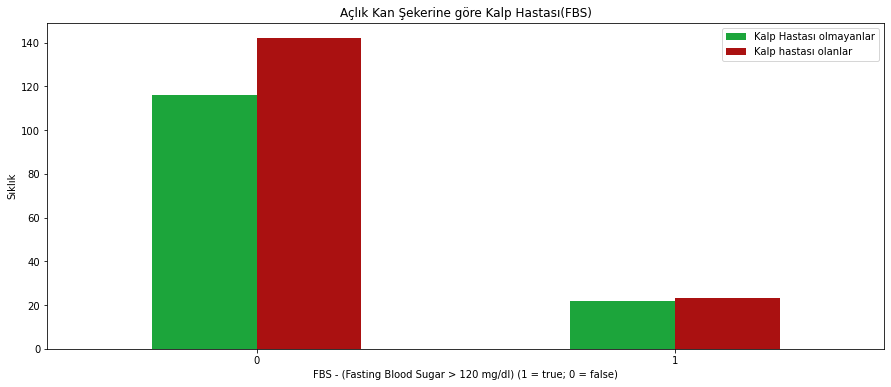

In [125]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Açlık Kan Şekerine göre Kalp Hastası(FBS)')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Kalp Hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()

#fbs (0, 1): açlık kan şekeri
# 0: yanlış
# 1: doğru

FBS de olanlar olmayanlar arasında çok fark yok gibi.

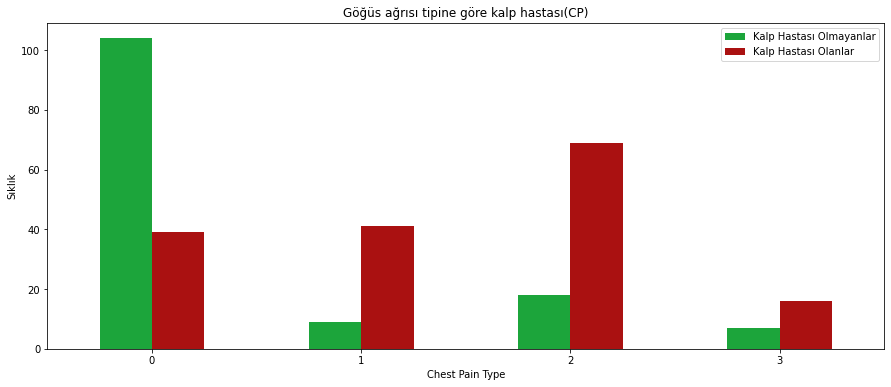

In [126]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Göğüs ağrısı tipine göre kalp hastası(CP)')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Kalp Hastası Olmayanlar", "Kalp Hastası Olanlar"])
plt.ylabel('Sıklık')
plt.show()

# cp (0,1,2,3): göğüs ağrısı tipi
# 0: tipik anjin ağrı
# 1: atipik anjin ağrı
# 2: anjin olmayan ağrı
# 3: asemptomatik ağrı

Yukarıdaki analizler sonucunda göğüs ağrısı tipi 0 olanlarda kalp krizi görülme daha az ancak 1,2,3 olanlarda daha çok olduğunu söyleyebiliriz.

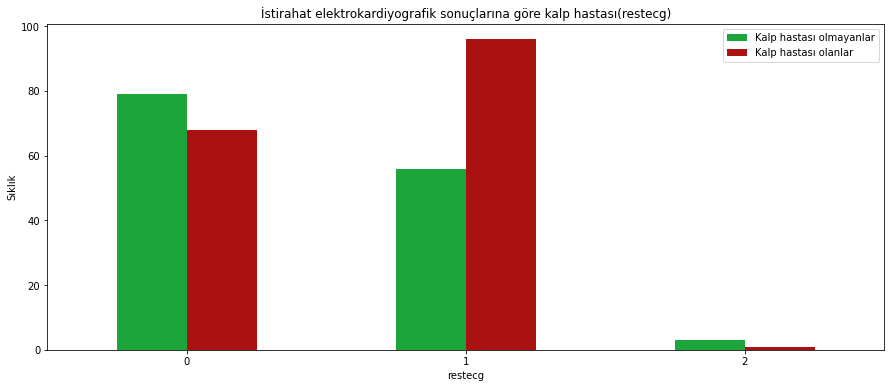

In [127]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('İstirahat elektrokardiyografik sonuçlarına göre kalp hastası(restecg)')
plt.xlabel('restecg')
plt.xticks(rotation = 0)
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()

#restecg (0, 1, 2): istirahat elektrokardiyografik sonuçlar
# 0: normal
# 1: ST-T anormalliği
# 2: olası veya belirgin sol ventriküler Estes kriteri

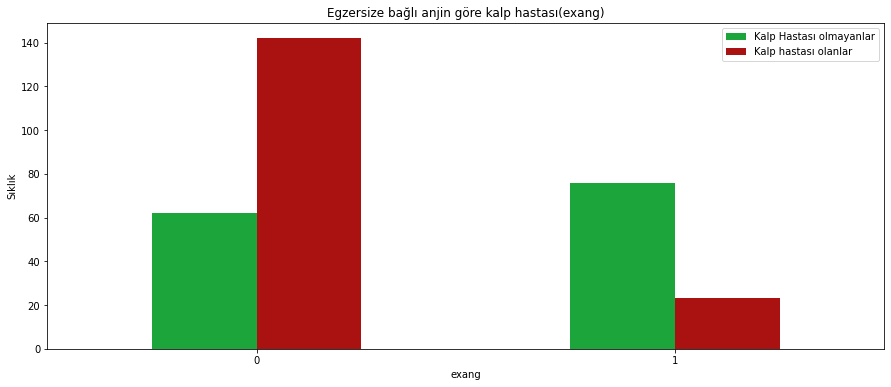

In [128]:
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Egzersize bağlı anjin göre kalp hastası(exang)')
plt.xlabel('exang')
plt.xticks(rotation = 0)
plt.legend(["Kalp Hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()

#exang (0, 1): egzersize bağlı anjin
# 0: yok
# 1: var

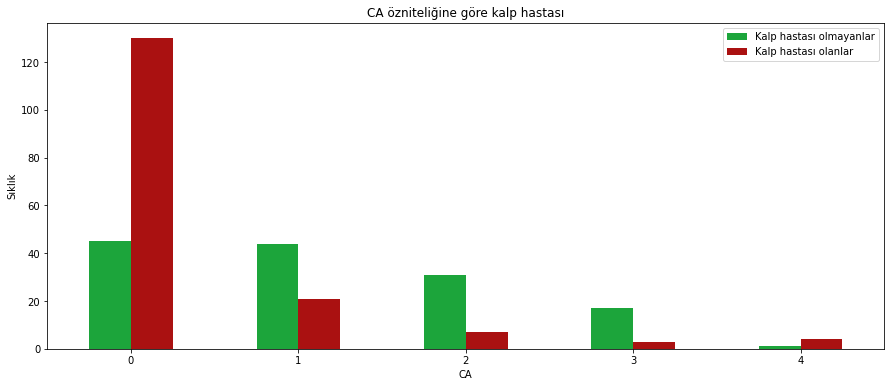

In [129]:
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('CA özniteliğine göre kalp hastası')
plt.xlabel('CA')
plt.xticks(rotation = 0)
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()


#ca ( 0,1,2,3,4): pik egzersiz için floroskopi ile renklendirilmiş büyük damar sayısı

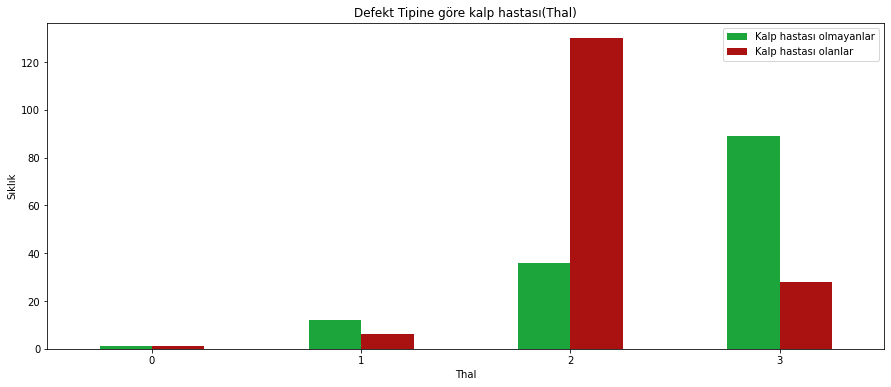

In [130]:
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Defekt Tipine göre kalp hastası(Thal)')
plt.xlabel('Thal')
plt.xticks(rotation = 0)
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.ylabel('Sıklık')
plt.show()

# thal (3,6,7): defekt tipi
# 3: normal
# 6: belirlenmiş defekt
# 7: tersinir defekt

Nümerik değişkenlere bakalım.

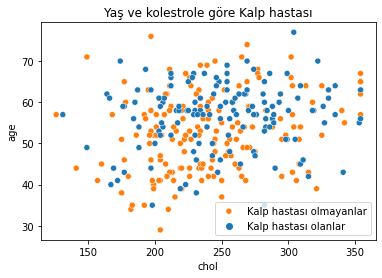

In [131]:
sns.scatterplot(x="chol",y="age",data=df,hue="target")
plt.title('Yaş ve kolestrole göre Kalp hastası')
plt.legend(["Kalp hastası olmayanlar", "Kalp hastası olanlar"])
plt.show()

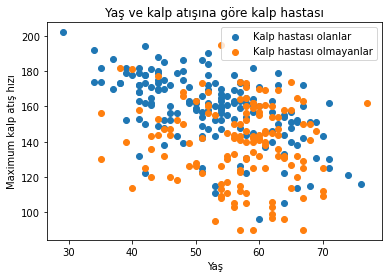

In [132]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.title('Yaş ve kalp atışına göre kalp hastası')
plt.legend(["Kalp hastası olanlar", "Kalp hastası olmayanlar"])
plt.xlabel("Yaş")
plt.ylabel("Maximum kalp atış hızı")
plt.show()

Genç olup kalp atış hızı yüksek olanların kalp krizi geçirmesinin fazla olduğunu görüyoruz.

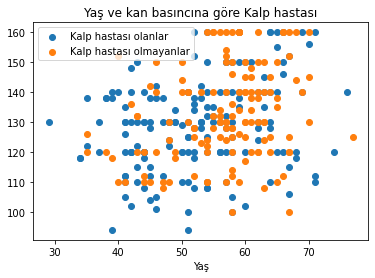

In [133]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)])
plt.title('Yaş ve kan basıncına göre Kalp hastası')
plt.legend(["Kalp hastası olanlar", "Kalp hastası olmayanlar"])
plt.xlabel("Yaş")
plt.ylabel("")
plt.show()

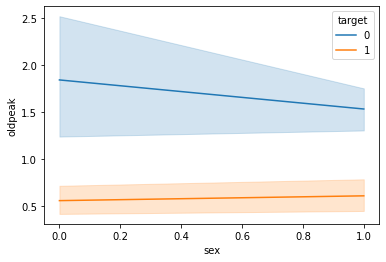

In [134]:
sns.lineplot(x="sex", y="oldpeak",
             hue="target",data=df)
plt.show()

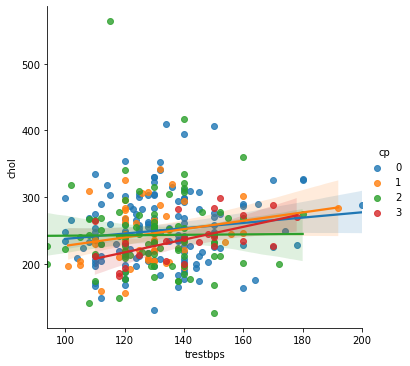

In [135]:
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()

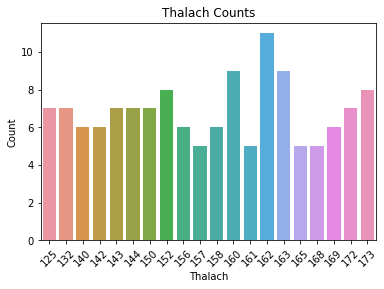

In [136]:
sns.barplot(x=df.thalach.value_counts()[:20].index,y=df.thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [137]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.287621,0.203358,-0.398243,0.210013,-0.225439
trestbps,0.287621,1.000000,0.126351,-0.055588,0.183027,-0.132020
chol,0.203358,0.126351,1.000000,-0.021309,0.040699,-0.106530
thalach,-0.398243,-0.055588,-0.021309,1.000000,-0.347403,0.422271
oldpeak,0.210013,0.183027,0.040699,-0.347403,1.000000,-0.430696
target,-0.225439,-0.132020,-0.106530,0.422271,-0.430696,1.000000


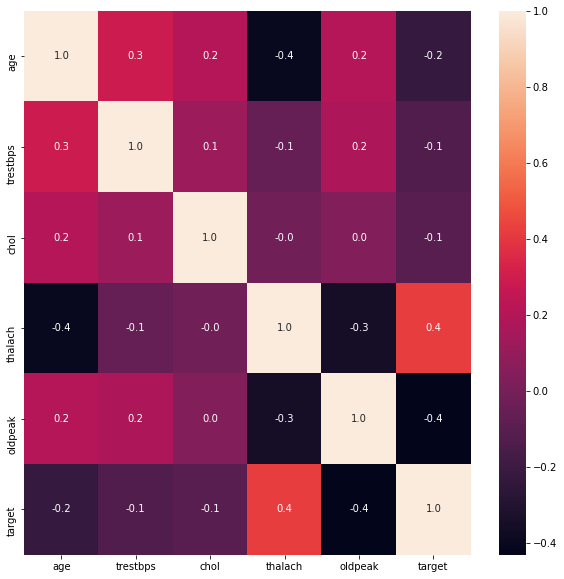

In [138]:
#Korelasyon matrisine bakalım. Birbiriyle yüksek derece korele olanlar var mı ?

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

Birbiri ile yüksek korele olmadığını görüyoruz nümerik değerlerin.

GÖZETİMSİZ ÖĞRENME MODELLERİNİ UYGULAYALIM. Bunu daha çok öğrenme tekrar etme amaçlı yapıyorum. Esas modellerim gözetimli öğrenme üzerine olan kısım olacaktır. 
Ayrıca kümeleme ödevlerinde bu veriseti olduğundan o ödevleri de bu projenin içerisinde yapmak için uyguluyorum.

K means kumeleme algoritmasını kullanalım.(Gözetimsiz öğrenme algoritması)

In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [140]:
scaler = StandardScaler()
dfn = scaler.fit_transform(df)

In [141]:
kmeans_küme = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_küme.fit(dfn)
y_pred = kmeans_küme.predict(dfn)
y=df.target
#plt.scatter(dfn[:,0], dfn[:,1], c=y_pred)
#plt.show()

49.8 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


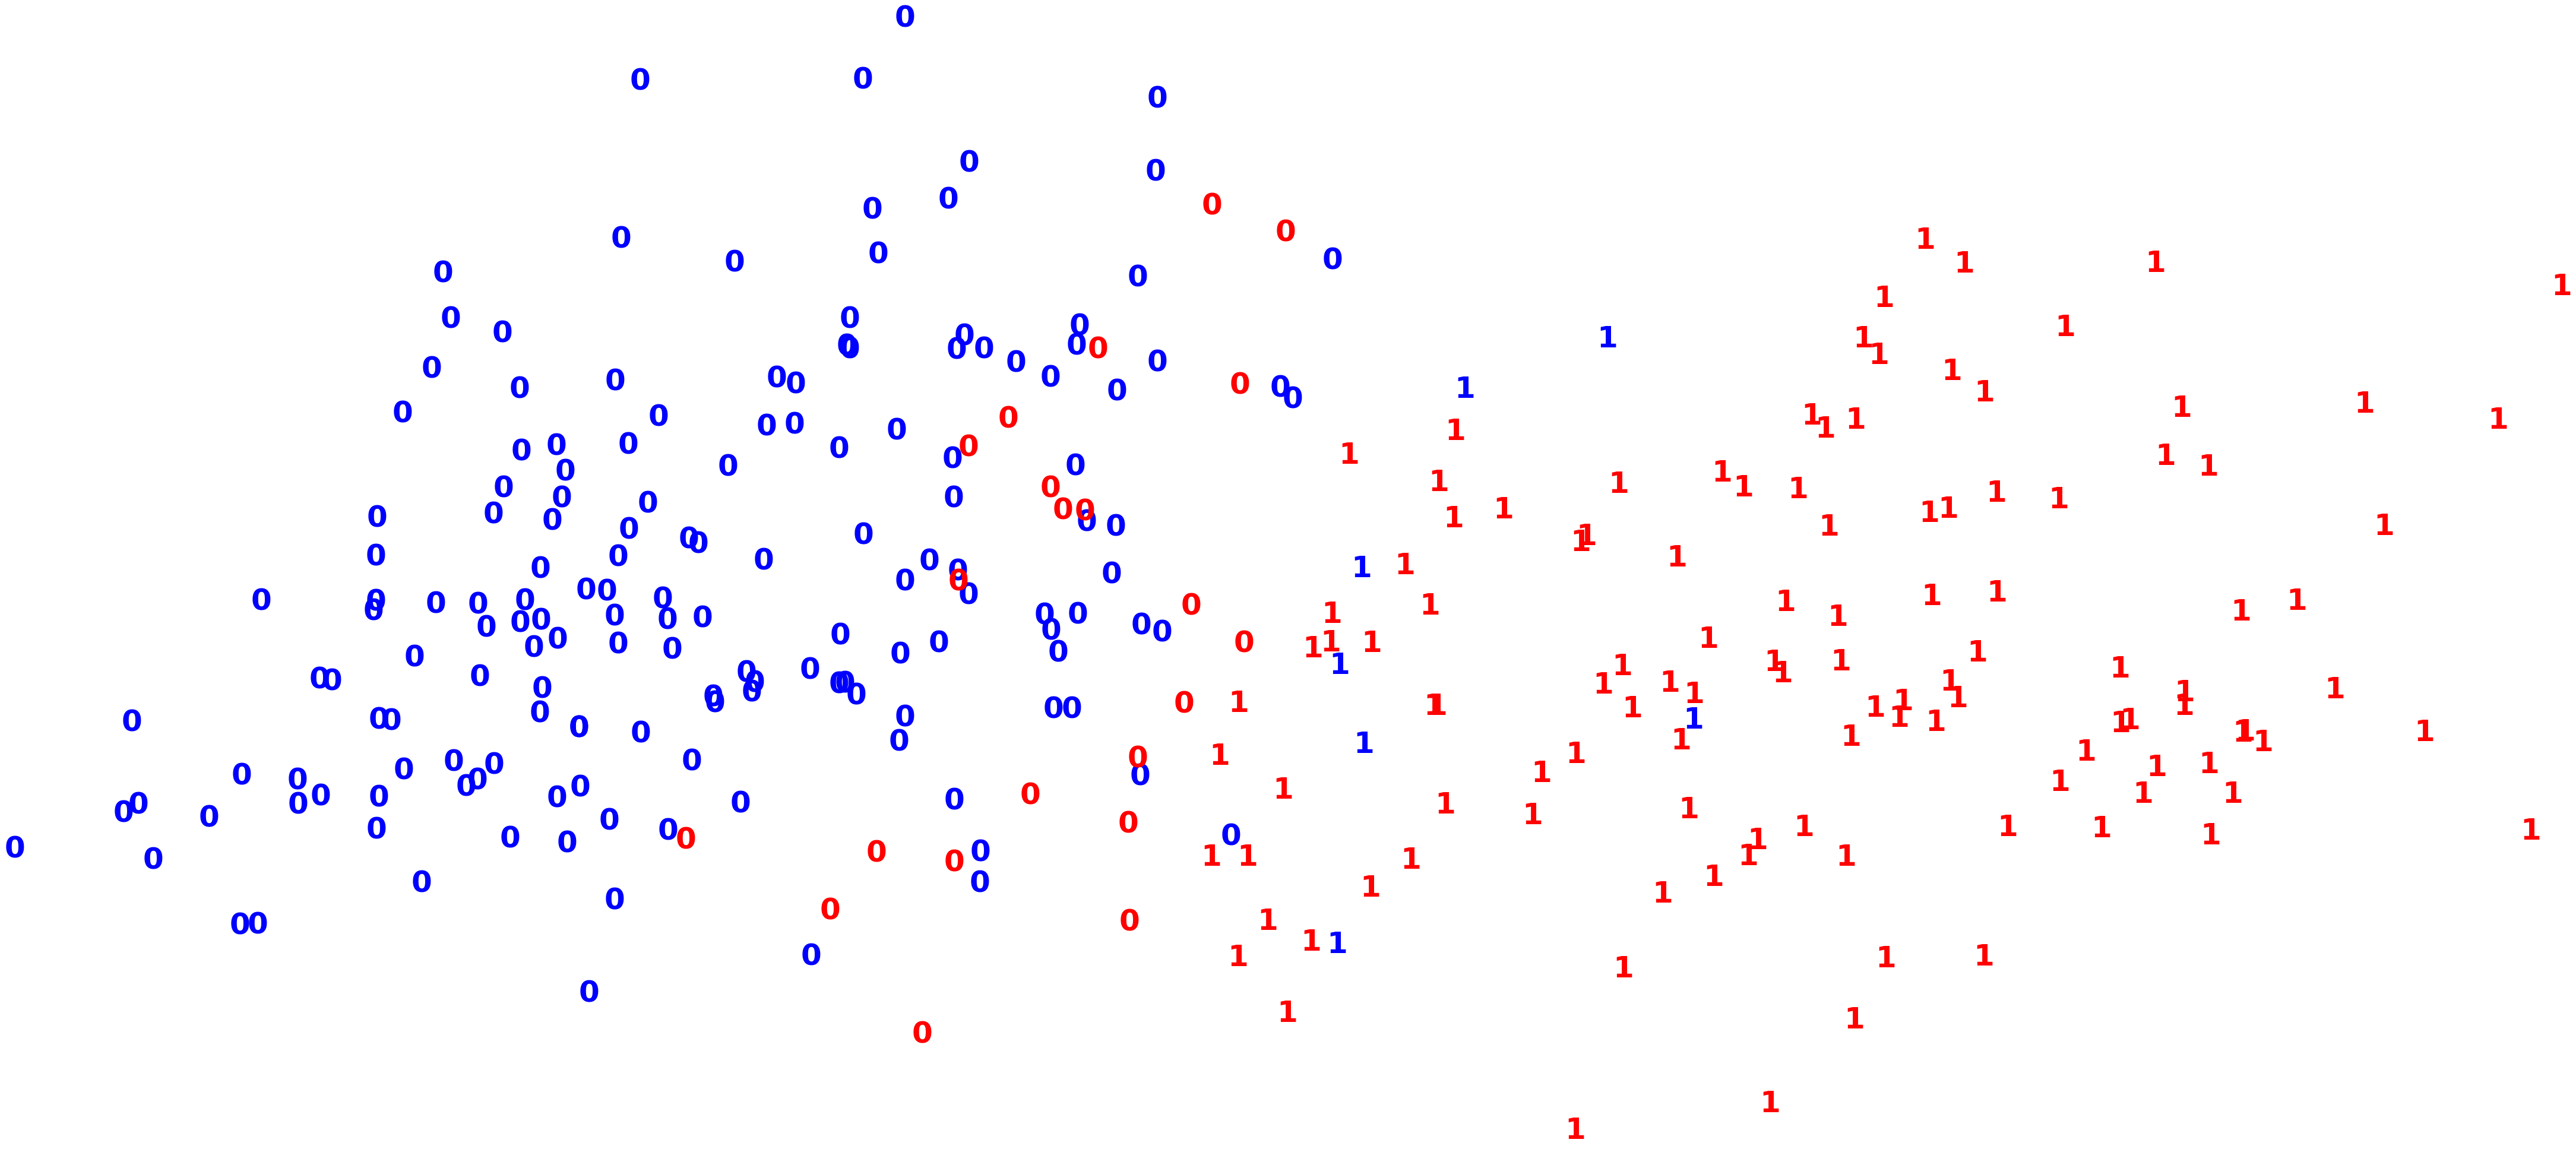

In [142]:
#Görselleştirmek için PCA uygulayalım.
pca = PCA(n_components=2).fit_transform(dfn)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

K-meanse uygun bir veri dağılımı değil. Deneme amaçlı uygulamıştım. Görüntü olarak çok kötü bir sonuç.

Kümeleme performansını ölçelim.

In [223]:
#X=data.drop("target",axis=1)
y=df.target
X=df


# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [224]:
#Olumsallık çizelgesi (contingency table)

# Tahmin edilen kümelemenin elde edilmesi.
tam_tahmin = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
#tam_tahmin = np.array([0 if x == 1 else 1 if x==0 else 2 for x in tam_tahmin])

pd.crosstab(y, tam_tahmin) 
 


col_0,0,1
target,,
0,20,118
1,144,21


Sonuçlar çok da güzel değil.

In [146]:
#Rand Endeksi

import scipy 

def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)


In [226]:
rand_index_score(y, tam_tahmin)
#1 e yakın olmadığından kötü bir sonuç

0.6949271086049003

In [227]:
#gerçek etiketlere sahip olmadığımızda;(siluet katsayısı)
from sklearn import datasets, metrics
etiketler = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.1550426584714247


In [228]:
etiketler = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.16423078146897446


Diğer kümeleme algoritmalarından hiyerarşik kümelemeyi kullanalım. Ve k means de ki performans ölçmelerle kıyaslayalım.

In [229]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [230]:
# Yığınsal Kümelemenin Tanımlanması
#agg_küme = AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=2)
agg_küme = AgglomerativeClustering(linkage='ward',n_clusters=2)
# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

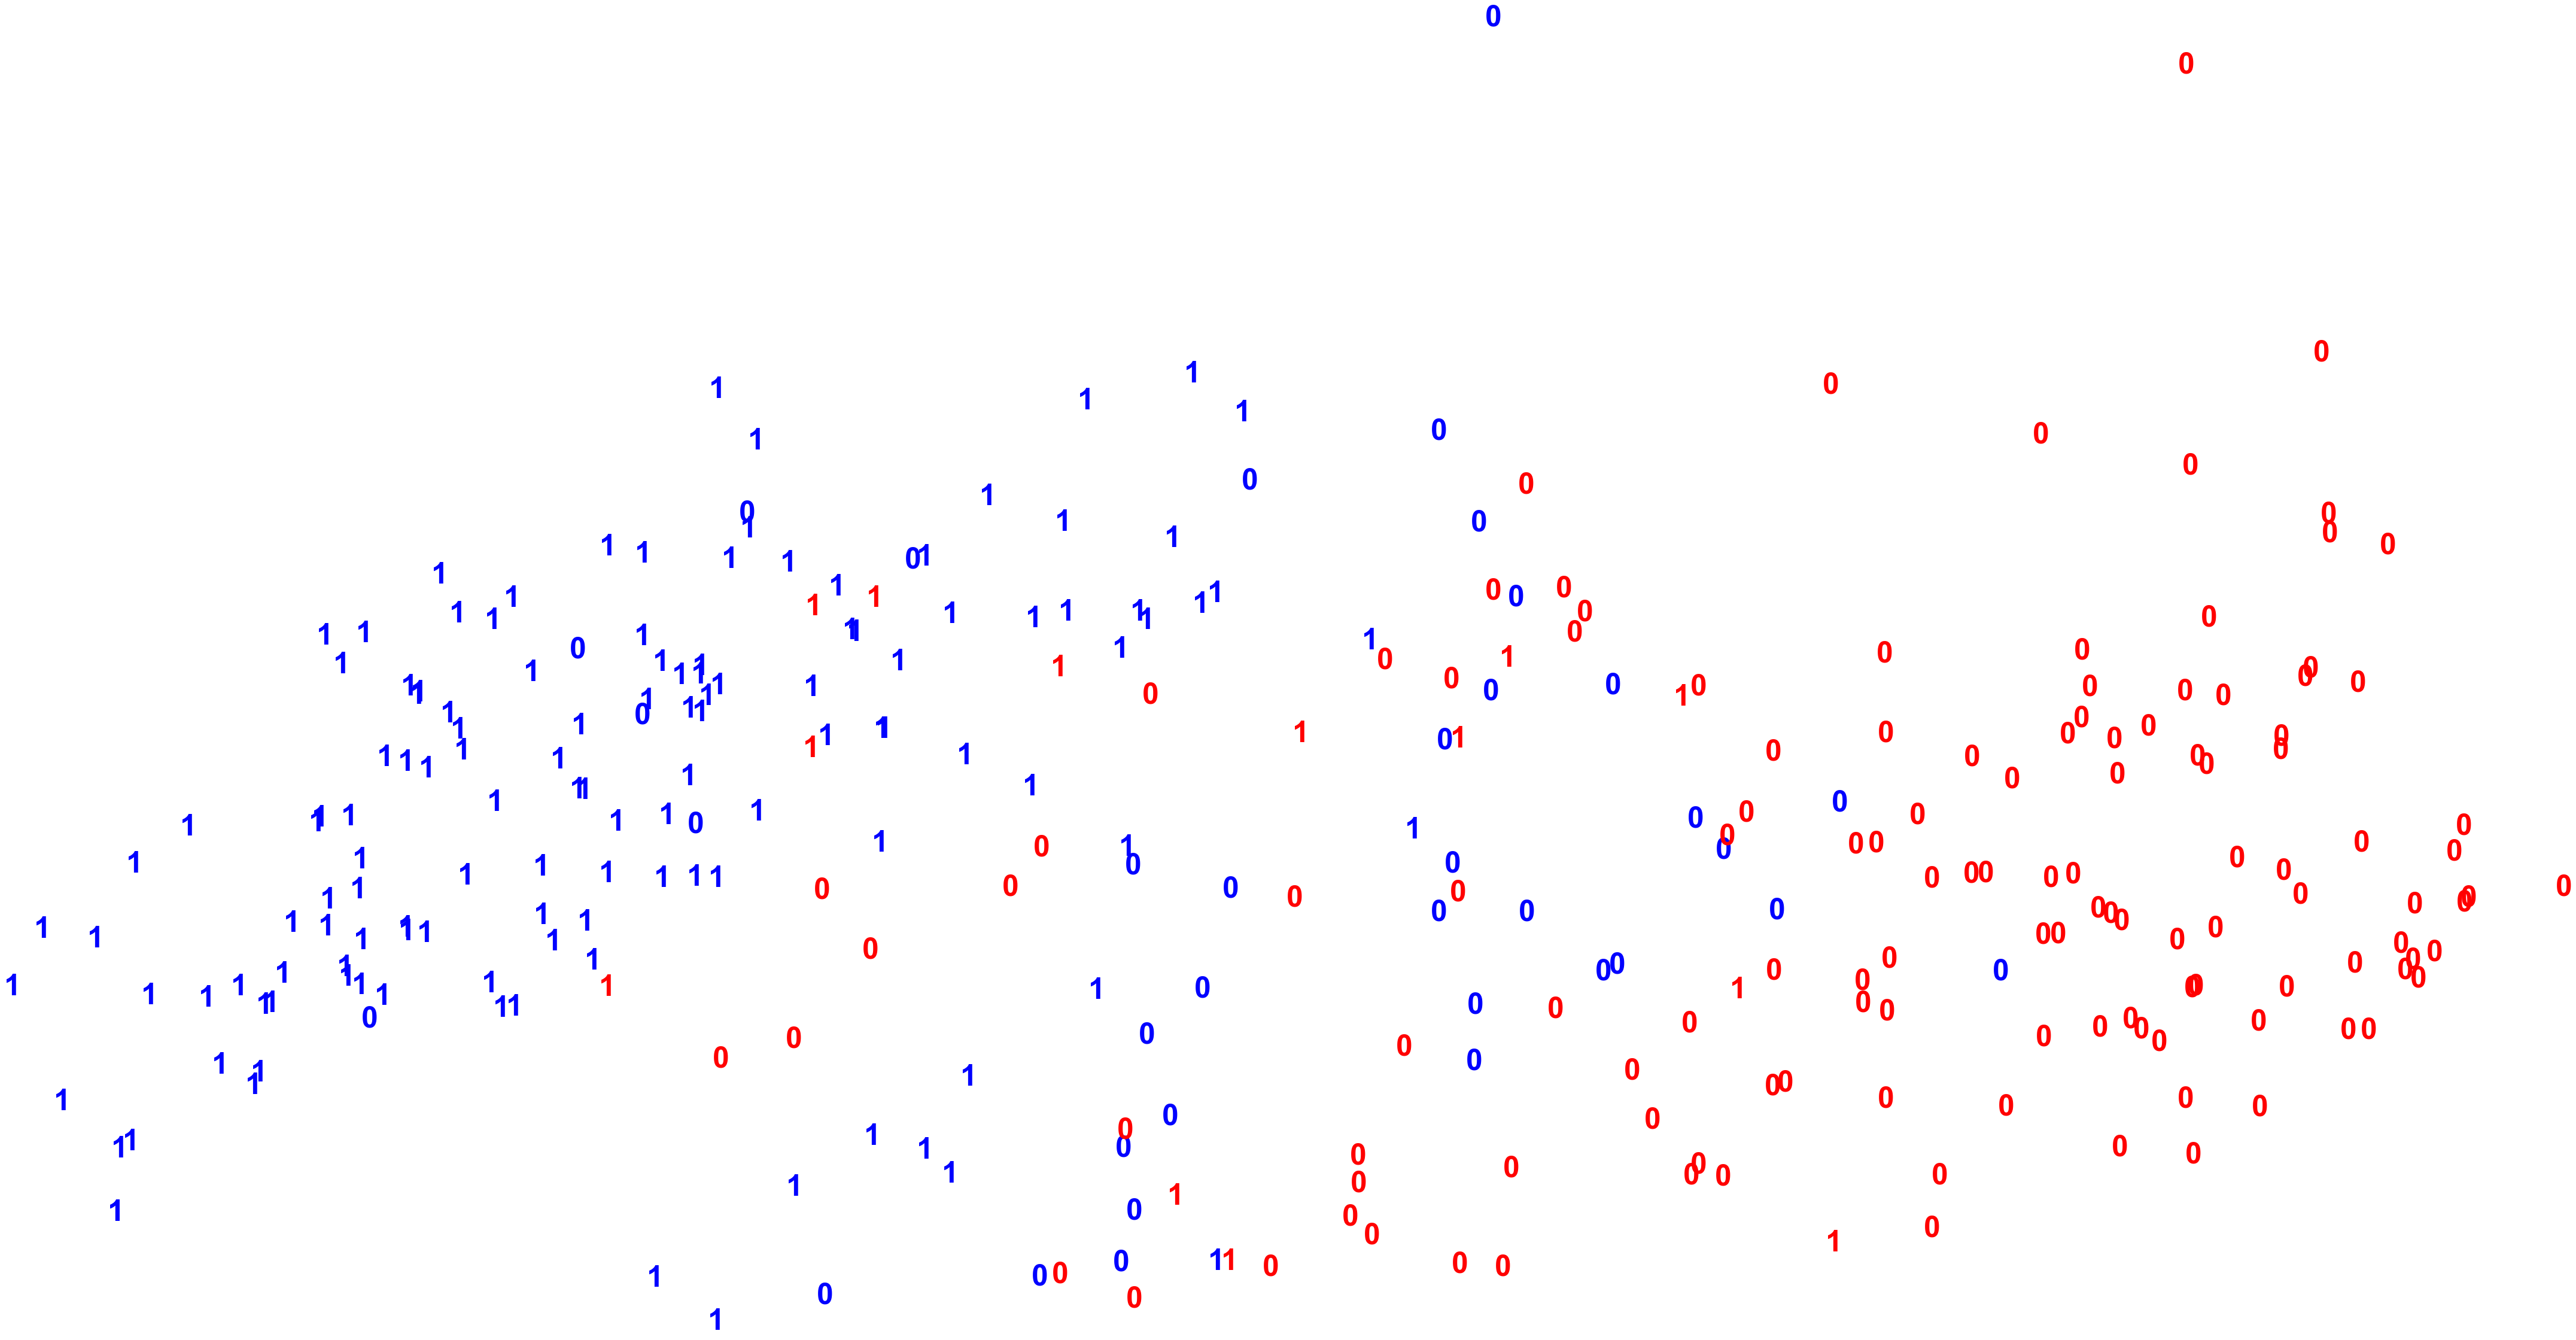

In [231]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [232]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.4559466384432444
The silhoutte score of the Agglomerative Clustering solution: 0.12906515383802566


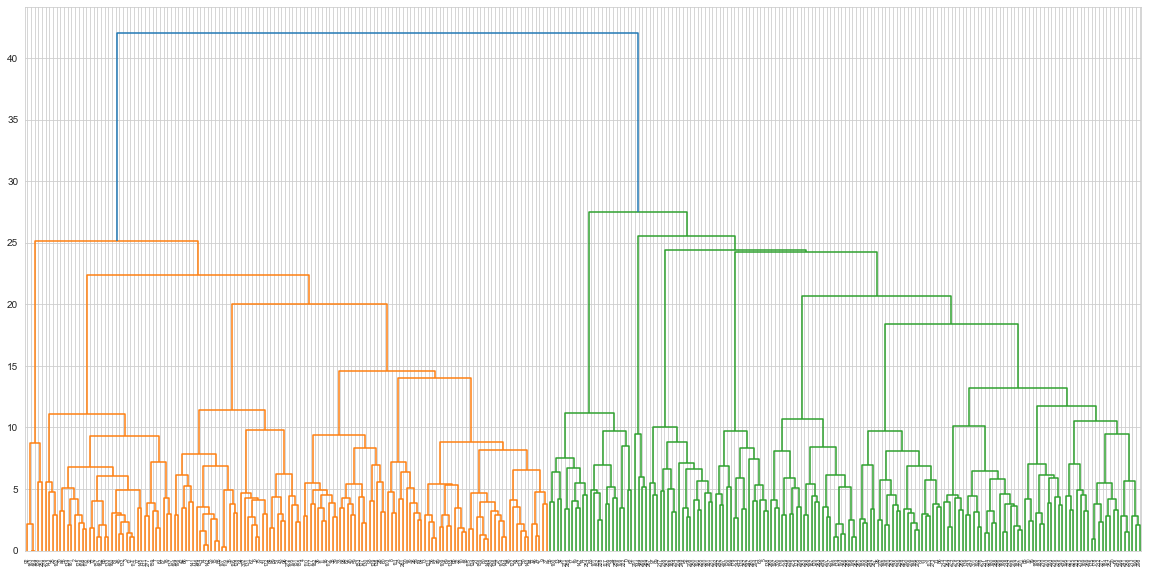

In [233]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

GMM kümeleme algoritmasını deneyelim.

In [234]:
from sklearn.mixture import GaussianMixture

In [235]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [163]:
clusters = gmm_cluster.fit_predict(X_std)

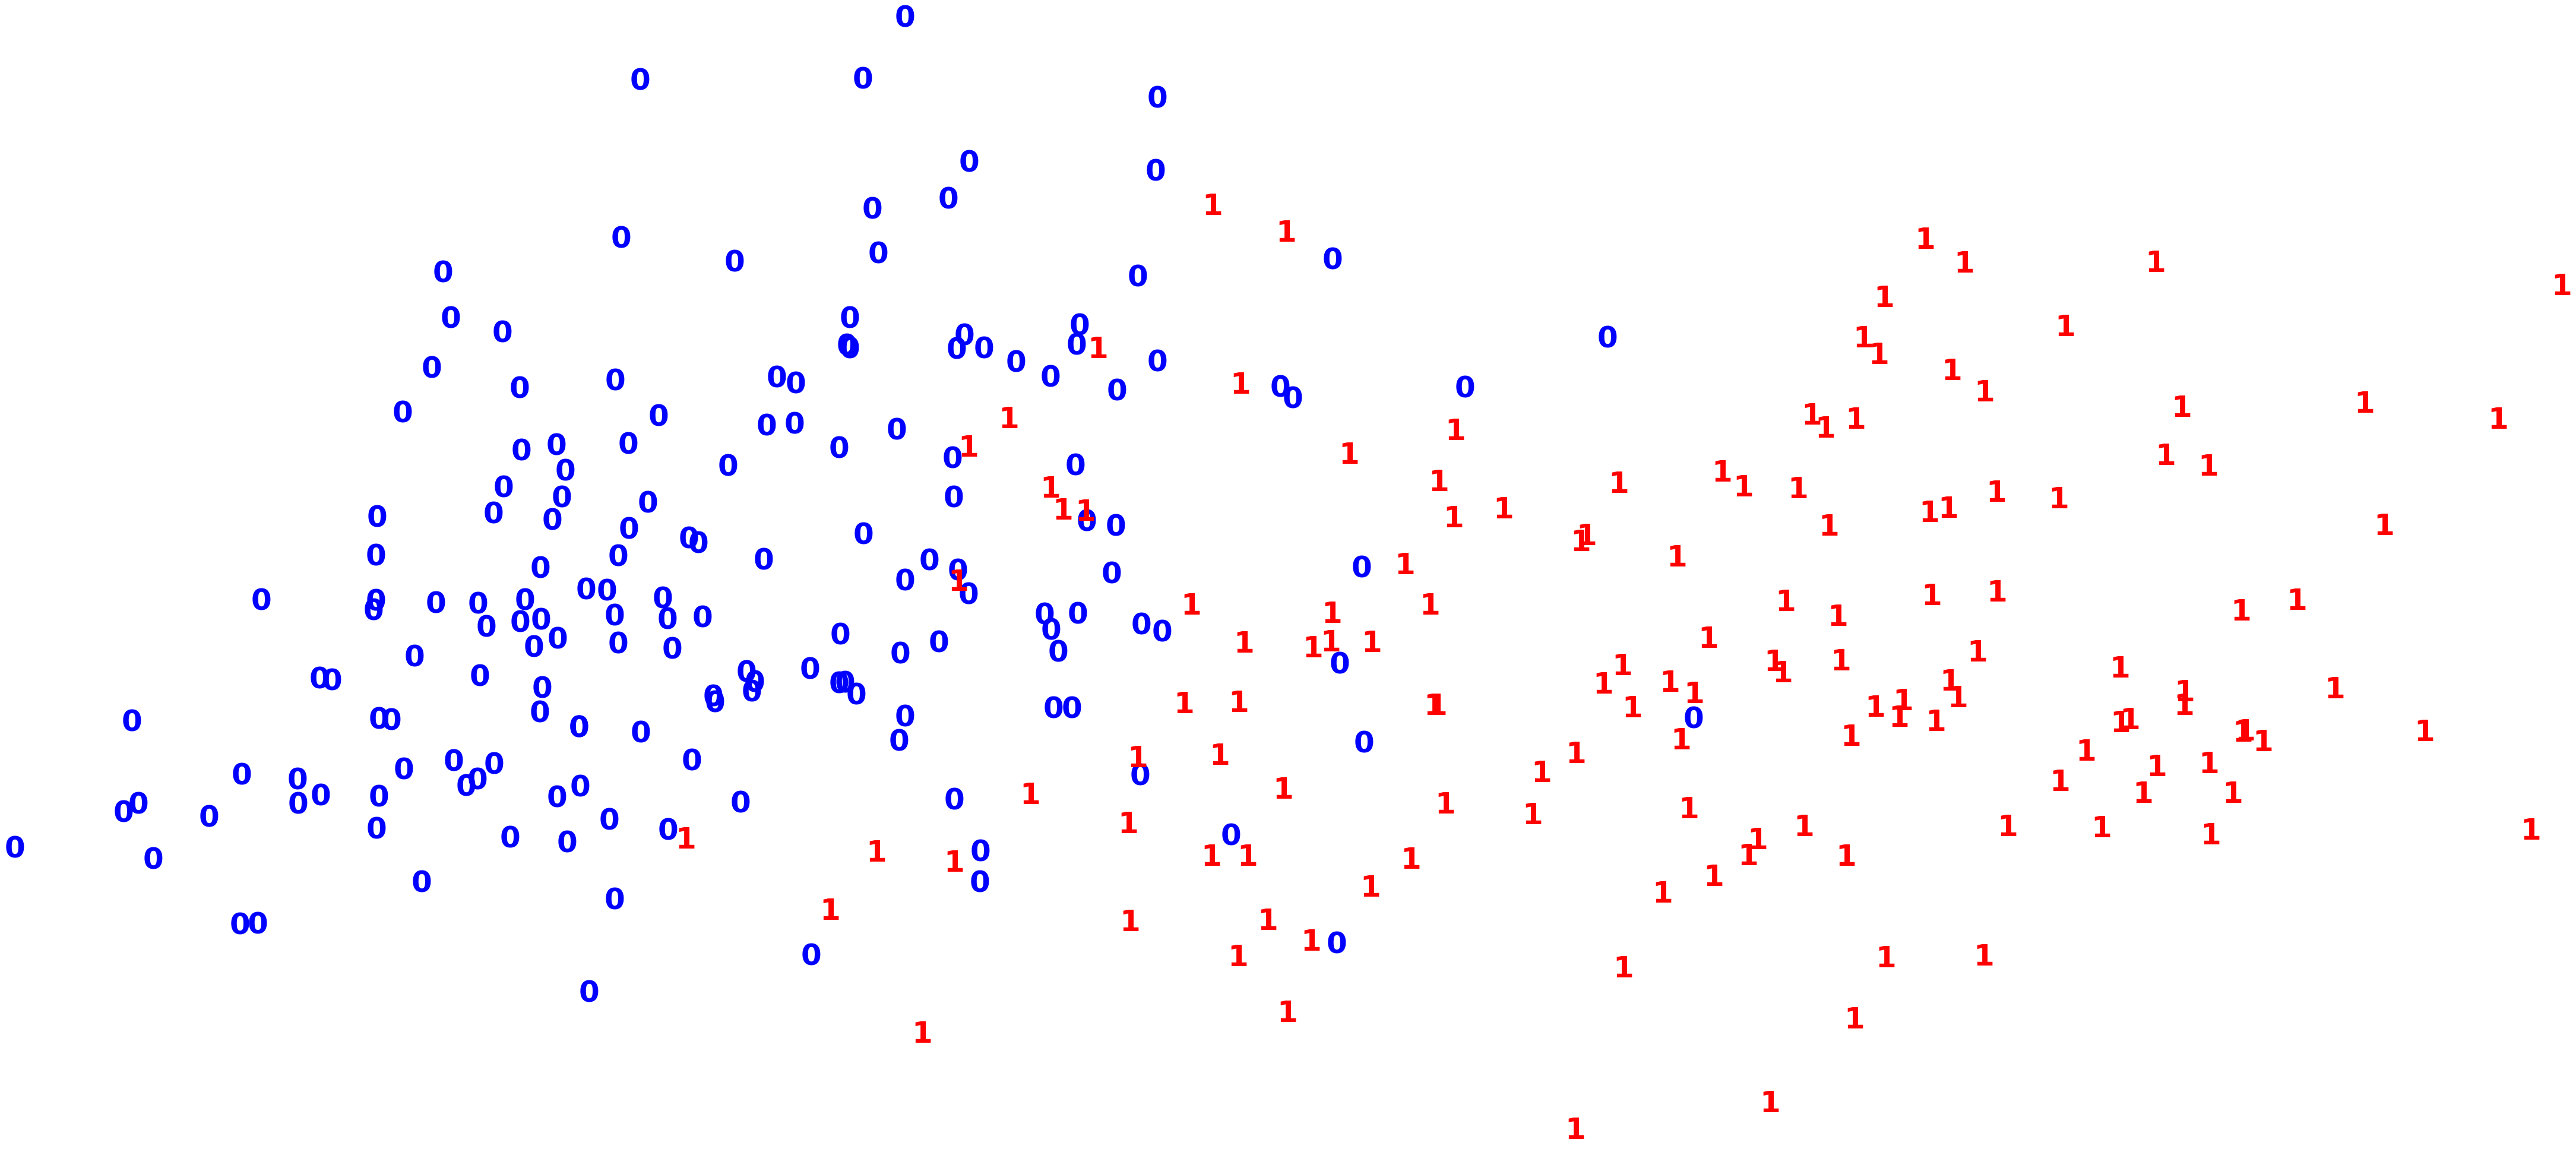

In [164]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [165]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 1.000
GMM çözümünün siluet skoru                  : 0.160


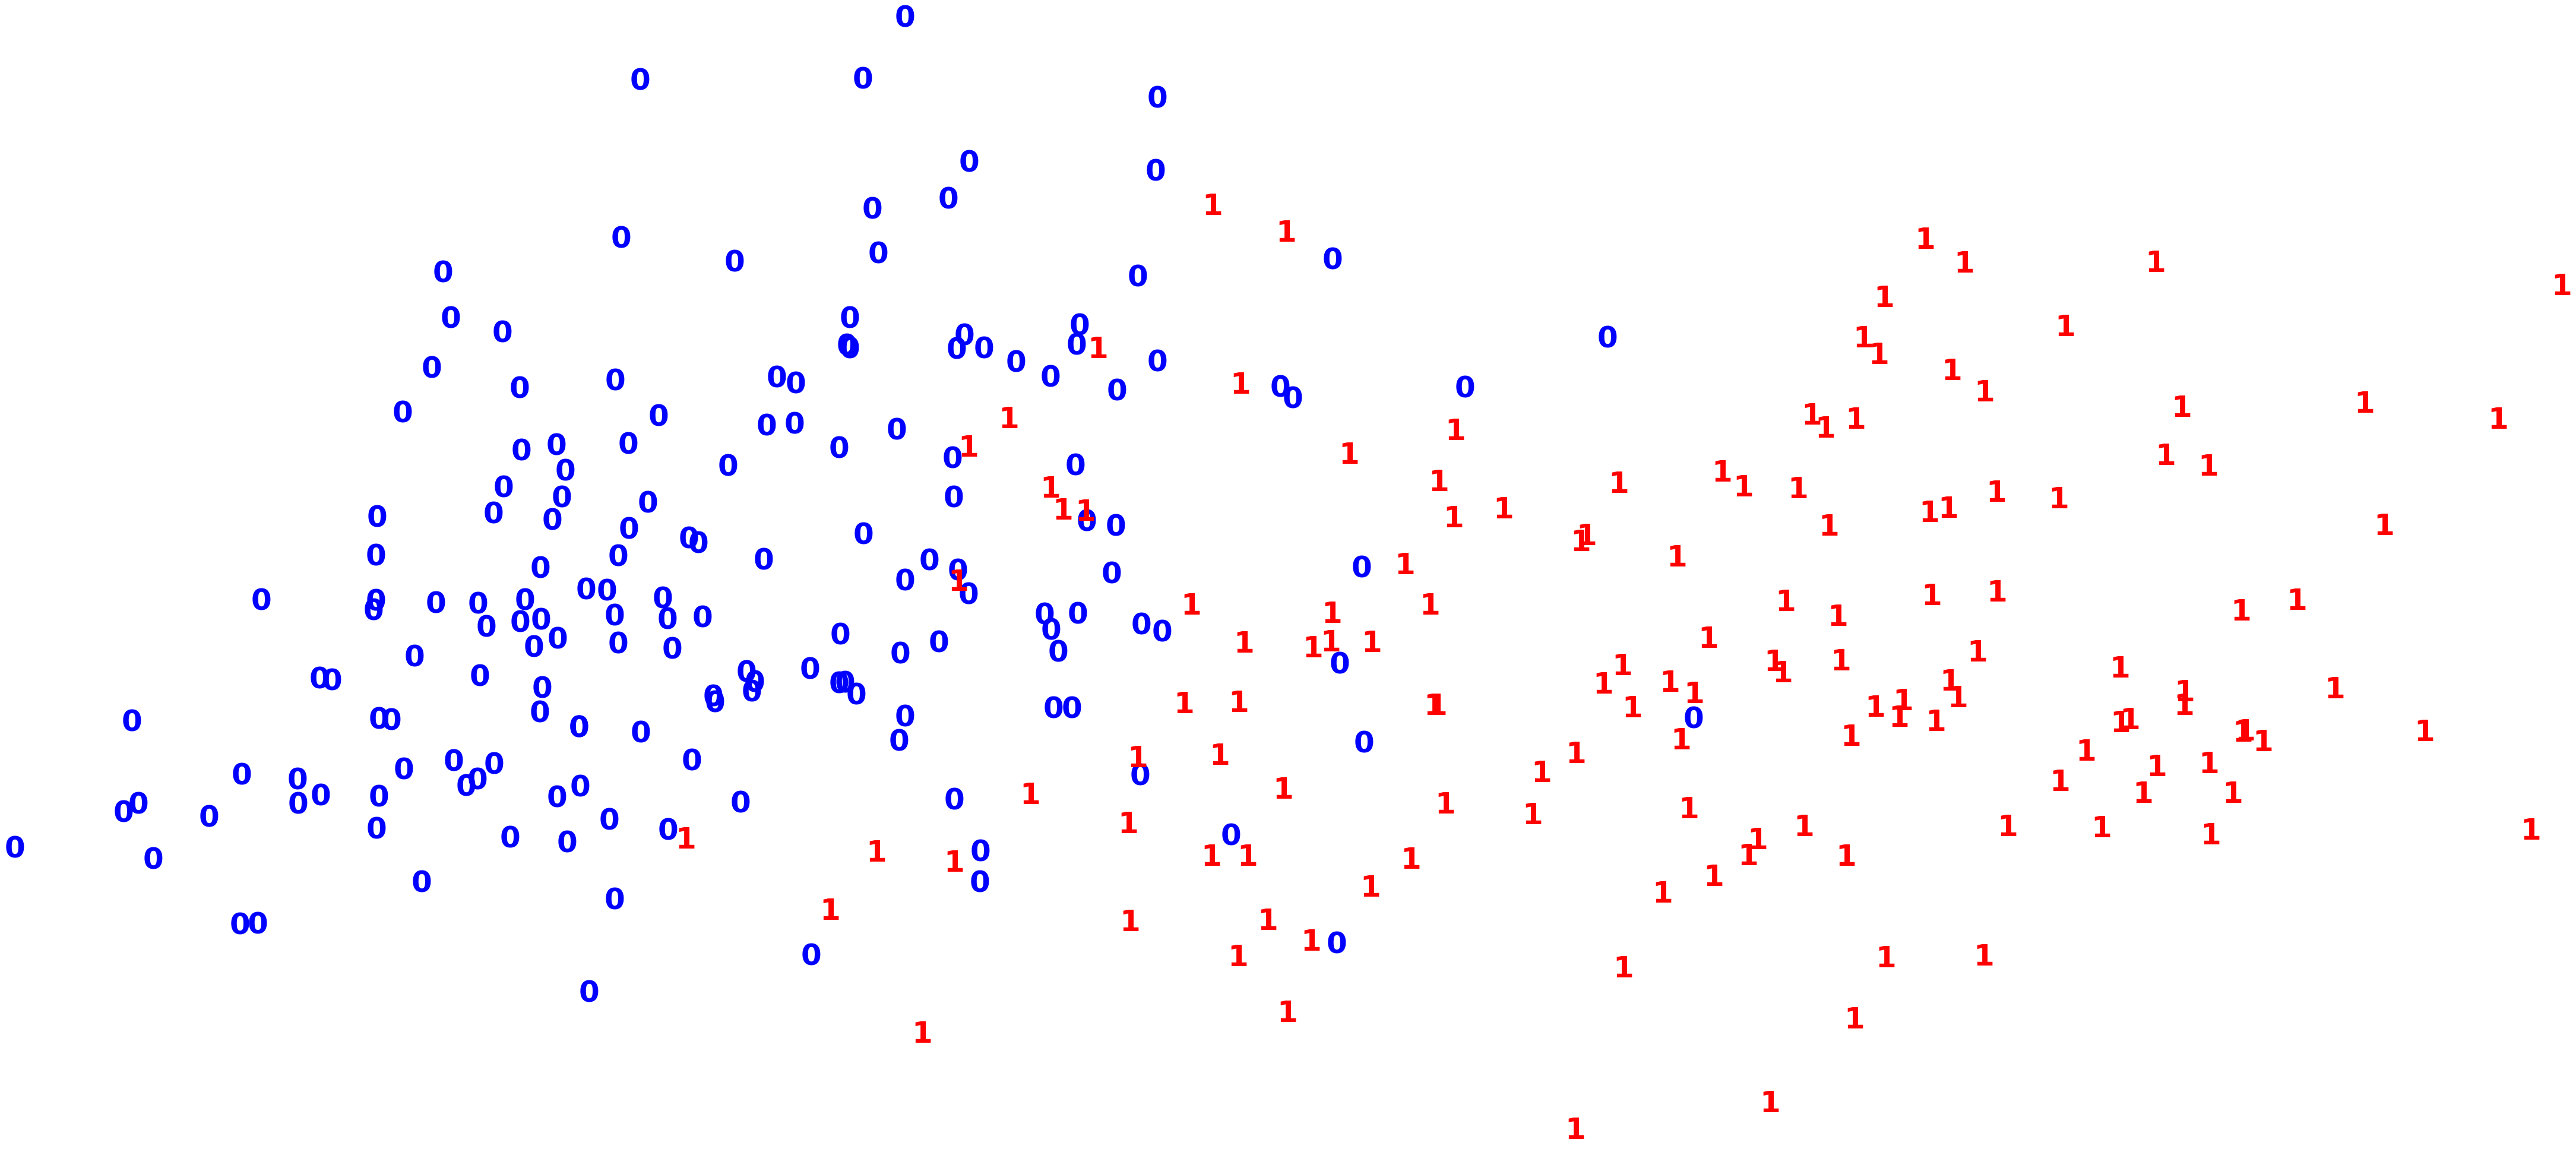

In [166]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Kümeleme algoritmalarında çok güzel bir model kuramadım. 

Gözetimli öğrenme modellemelerimize geçelim.

In [167]:
#Kategorik değişkenleri one hot encounding yapalım. Makina öğrenmesi algoritmalarımızın çalışabilmesi için.
df = pd.get_dummies(df, drop_first=True)

In [168]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [169]:
dt=df.copy()
#Ölçeklenmemiş son hali dt dataframe de dursun.

In [170]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [171]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [172]:
X=df.drop("target",axis=1)
y=df.target

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=44,test_size = 0.2)

In [174]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 22)
X_test (61, 22)
y_train (242,)
y_test (61,)


In [175]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(3, knn.score(X_test, y_test)*100))

3 NN Score: 80.33%


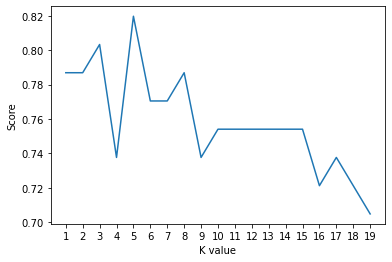

Maximum KNN Score is 81.97%


In [176]:
#Knn algoritması için en iyi k değerini belirleyelim.
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [177]:
#Knn modelinde cross validation yapalım.
cv = cross_validate(estimator=knn2,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')

Test Skorları            : 
[0.83870968 0.77419355 0.83870968 0.86666667 0.83333333 0.66666667
 0.83333333 0.73333333 0.66666667 0.8       ]


In [178]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())

Test Kümesi   Ortalaması :  0.7851612903225806


In [179]:
from sklearn.metrics import roc_curve, roc_auc_score
#roc eğrisine bakalım. Ne kadar 1'e yakın olursa o kadar iyi.

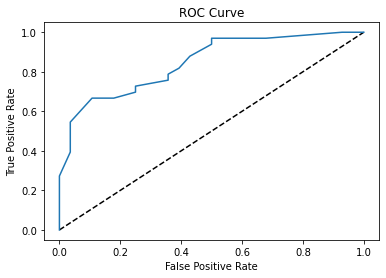

In [180]:
tahmin_test_ihtimal_knn = knn2.predict_proba(X_test)[:,1]


fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal_knn)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [181]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal_knn))

AUC Değeri :  0.8457792207792209


In [182]:
#Xgboost
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=100,min_child_weight=4,max_depth=5,colsample_bytree=0.3,learning_rate=0.05,base_score=0.25)

In [183]:
xg.fit(X_train,y_train)

[10:16:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
y_pred=xg.predict(X_test)

In [185]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,y_pred),'\n')

print('Accuracy:{:0.3f}'.format(accuracy_score(y_test,y_pred)))

[[21  7]
 [ 8 25]] 

Accuracy:0.754


In [186]:
#acc = xg.score(X_test,y_test)*100
#accuracies['xg'] = acc

In [187]:
#Xgboost için hyperparametre ayarlaması yapalım. Bunun için grid search kullanalım.

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma':  [0.1, 0.01, 0.05],
    'min_child_weight': range (2, 10, 1)
}

In [188]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid=parameters,n_jobs = -1,cv = 5,verbose=2)

In [189]:
grid_search_xgb.fit(X, y)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[10:24:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [190]:
print("En iyi parametreler : ", grid_search_xgb.best_params_)

En iyi parametreler :  {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 140}


In [191]:
grid_search_xgb.score(X,y)

0.976897689768977

In [192]:
print("En iyi skor         : ", grid_search_xgb.best_score_)

En iyi skor         :  0.8281967213114754


Xgboost algoritmasında doğruluk değeri paramatre ayarlaması yapmadan önce %75 lerde iken grid search ile en iyi paramatreyi bulunca %97 lere çıktı.

In [193]:
#Grid search ile xgboost algoritmasını bulduğumuz doğruluk değerini ekleyelim karşılaştırma listemize.
acc = grid_search_xgb.score(X_test,y_test)*100
accuracies['xg'] = acc

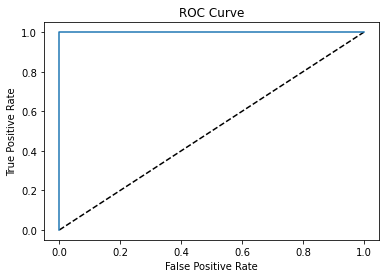

In [194]:
tahmin_test_ihtimal_xgb = grid_search_xgb.predict_proba(X_test)[:,1]


fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal_xgb)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [195]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal_xgb))

AUC Değeri :  1.0


In [196]:
#Svm modeli

from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10,random_state = 1)
svm.fit(X_train, y_train)

#print(svm.score(X_train, y_train))
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 98.36%


In [197]:
#grid search ile en iyi svm parametrelerini bulalım.
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

print(svm_cv.score(X_train, y_train))

acc = svm_cv.score(X_test,y_test)*100
accuracies['SVM'] = acc

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}
0.8636363636363636


In [198]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8,n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 72.13%


In [199]:
cv = cross_validate(estimator=rf,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')

Test Skorları            : 
[0.80645161 0.70967742 0.80645161 0.93333333 0.76666667 0.76666667
 0.73333333 0.73333333 0.76666667 0.8       ]


In [200]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())

Test Kümesi   Ortalaması :  0.782258064516129


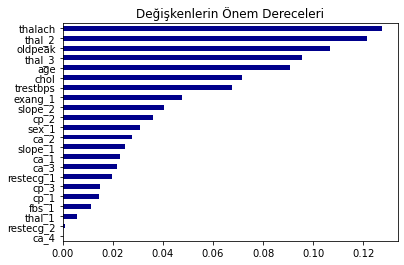

In [201]:
önem_dereceleri = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

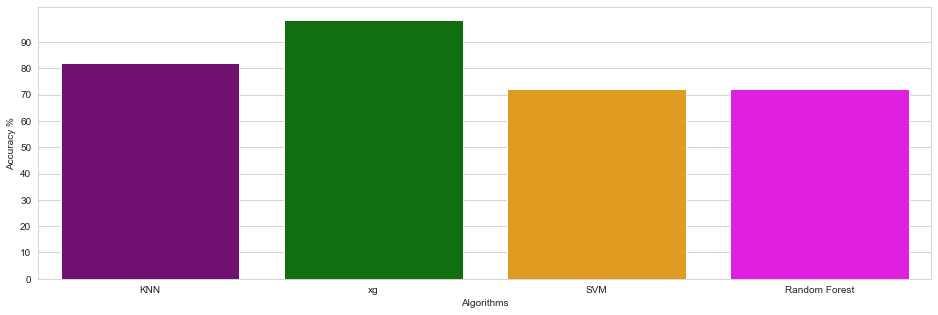

In [202]:
#Modellerin doğruluk metriğini karşılaştıralım.

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [203]:
#Confusion matrixlerini oluşturup kıyaslayalım.
# Predicted values

knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train, y_train)
y_head_knn = knn4.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_rf = rf.predict(X_test)
y_head_xg = xg.predict(X_test)

In [204]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_xg = confusion_matrix(y_test,y_head_xg)
cm_rf = confusion_matrix(y_test,y_head_rf)

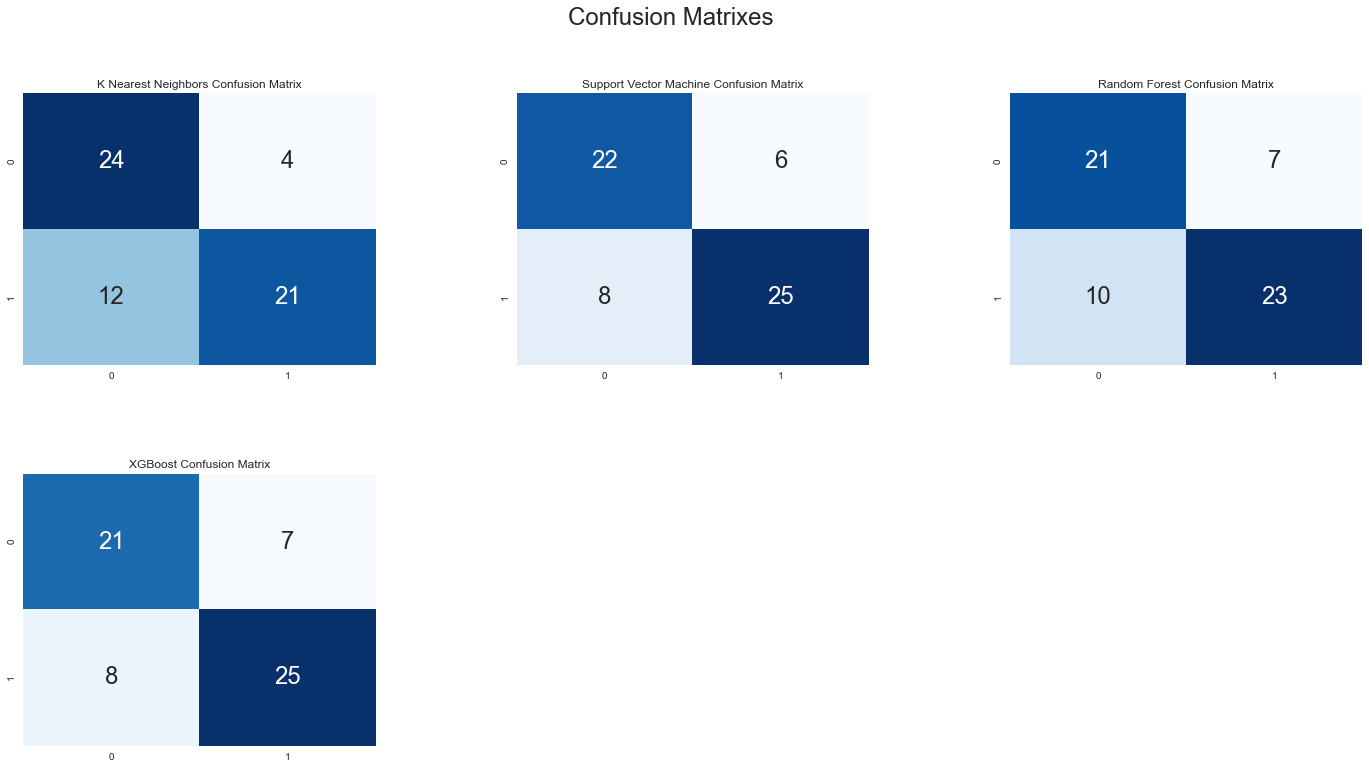

In [205]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(cm_xg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Sonuç
Bu çalışmanın amacı, yaş, cinsiyet, göğüs ağrısı tipi, dinlenme kan basıncı, serum kolestoral, açlık kan şekeri, dinlenme
elektrokardiyografik sonuçlar, elde edilen maksimum kalp atış hızı, egzersiz anjin, istirahate göre egzersizle indüklenen ST
depresyonu, pik egzersiz için ST segmentinin eğimi, floroskopi ile renklendirilen büyük damarların sayısıdan kaynaklı 13 özellik ile kalp hastalığının varlığını daha doğru tahmin etmektir. Rastgele Orman, k-NN, Xgboost, Destek Vektör Makinesi algoritmaları bu veri setine uygulanmıştır. Algoritmalar Kaggle veri setinden 303 hastaya uygulanmış ve bu veri madenciliği sınıflandırma algoritmalarının doğruluk oranları karşılaştırılmıştır. 
Sonuçlara göre, farklı metodolojilerin farklı kriterlerle başarılı olduğu ve kriterlerin ortalaması alındığında XGboost'un en doğru ve en iyi sonucu veren yöntem olduğu görülmektedir

Derin öğrenme ile çalışalım. Çok fazla veri olmadığı için tercih edilmeyebilir.Ancak burada öğrenme amaçlı uygulayacağım. Belki sentetik veri türetme metodlarını uygulayabiliriz. Daha sonrasında derin öğrenme modelini kurabiliriz.

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [207]:
# convert the data to categorical labels
#from tensorflow.keras.utils import to_categorical


#Y_train = to_categorical(y_train, num_classes=None)
#Y_test = to_categorical(y_test, num_classes=None)
#print (Y_train.shape)
#print (Y_train[:10])

In [208]:
input_number = X_train.shape[1]
print(input_number)

22


In [209]:
classification_model = Sequential()
classification_model.add(Dense(8, 
                               activation='relu', 
                               input_shape = (input_number,), 
                               name = "Hidden_Layer_1"))

In [210]:
classification_model.add(Dense(2, 
                               activation='relu', 
                               name = "Hidden_Layer_2"))

In [211]:
classification_model.add(Dense(1, activation='sigmoid', name = "Output"))

In [212]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 8)                 184       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 2)                 18        
_________________________________________________________________
Output (Dense)               (None, 1)                 3         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [213]:
#compile
classification_model.compile(optimizer ='adam',
                             loss='binary_crossentropy', 
                             metrics =['accuracy'])

In [214]:
#fit
history=classification_model.fit(X_train, y_train, epochs=200, verbose=0)
history

In [215]:
#evoluate
accuracy_train = classification_model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = classification_model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.921
Accuracy for test set  : 0.787


Eğitim ve test arasında çok fark olduğu için overfit olduğunu düşünebiliriz. belki biraz epoch sayısı, layer ve nöron sayıları ile oynayarak bunu engelleyebiliriz. Veri sayısı az olduğu için derin öğrenme içinde uygun olmayabilir.

In [216]:
#predict
y_pred=classification_model.predict(X_test)
y_pred =(y_pred>0.5)

In [217]:
#confusion matrix
hm = confusion_matrix(y_test, y_pred)
print(hm)

[[23  5]
 [ 8 25]]


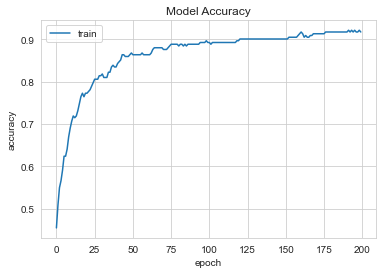

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()